# OpenCV Basics

## Drawing with OpenCV
 OpenCV 기본 그리기 기능을 사용하는 방법을 설명드리겠습니다.
 OpenCV에는 불규칙한 모양의 다각형을 포함하여 다양한 모양을 그리는 데 사용할 수 있는 여러 그리기 기능이 있지만 가장 일반적인 3가지 OpenCV 그리기 기능은 다음과 같습니다.
 * cv2.line : 지정된 (x, y) 좌표 에서 시작 하여 다른 (x, y) 좌표 에서 끝나는 이미지에 선을 그립니다.
 * cv2.circle : 중심 (x, y) 좌표와 제공된 반지름으로 지정된 이미지에 원을 그립니다.
 * cv2.rectangle : 왼쪽 위 모서리와 오른쪽 아래 모서리 (x, y) 좌표로 지정된 이미지에 직사각형을 그립니다.

### Import packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Function to display images in Jupyter Notebooks and Google Colab

In [2]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

3개(Red, Green, and Blue)의 채널이 있는 500x500 픽셀 이미지로 검정색 배경의 캔버스를 그립니다.

In [3]:
black_canvas = np.zeros((500, 500, 3), dtype="uint8")

zeros()에 255를 더하면 배경색을 흰색으로 변경 가능합니다.

In [4]:
white_canvas = np.zeros((500, 500, 3), dtype="uint8") + 255

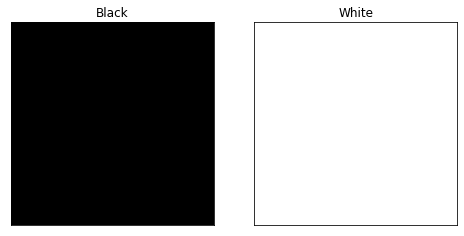

In [5]:
img_show(["Black", "White"], [black_canvas, white_canvas])

### Draw Line
```cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])``` → img  

| Parameter | 내용                                                         |
| --------- | ------------------------------------------------------------ |
| img       | 이미지 파일                                                  |
| pt1       | 시작점 좌표 (x, y)                                           |
| pt2       | 종료점 좌표 (x, y)                                           |
| color     | 색상 (blue, green, red) 0 ~ 255                              |
| thickness | 선 두께 (default 1)                                          |
| lineType  | 선 종류 (default cv.Line_8) - LINE_8 : 8-connected line - LINE_4 : 4-connecterd line - LINE_AA : antialiased line |
| shift     | fractional bit (default 0)                                   |


```line()``` 함수를 이용하여 두 좌표를 잇는 선을 그을 수 있습니다.

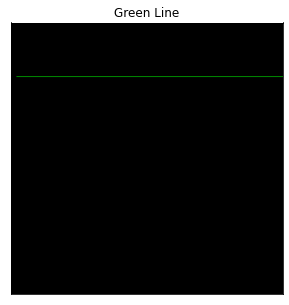

In [6]:
green = (0, 255, 0)

#(x1, y1) (x2, y2)
cv2.line(black_canvas, (10, 100), (500, 100), green)
img_show("Green Line", black_canvas)

(500, 0) 의 오른쪽 상단 지점에서 (0, 500)의 왼쪽 아래에 있는 점까지 연결 된 두께가 있는 (5Pixel) 선을 그립니다.  

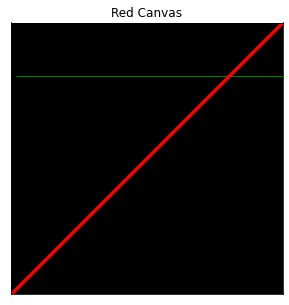

In [7]:
red = (0, 0, 255)
cv2.line(black_canvas, (500, 0), (0, 500), red, 5)
img_show("Red Canvas", black_canvas)

동일 좌표 입력 시 점으로 찍을 수 있습니다.

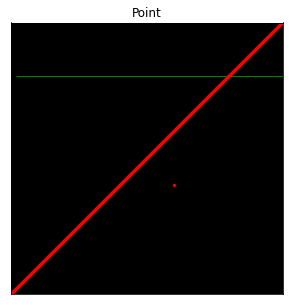

In [8]:
cv2.line(black_canvas, (300, 300), (300, 300), red, 5)
img_show("Point", black_canvas)

```arrowedLine()```함수를 이용하여 화살표를 그릴 수 있습니다.  
파라미터는 line() 함수와 동일 한데 마지막에 화살표의 크기를 설정하는 tipLength가 하나 더 있습니다.

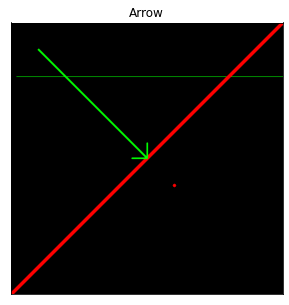

In [9]:
cv2.arrowedLine(black_canvas, (50, 50), (250, 250), green, thickness=2)
img_show("Arrow", black_canvas)

### Draw Rectangle
(10, 10) 에서 시작하여 (110, 110) 에서 끝나는 녹색 100x100 픽셀 정사각형을 그립니다.

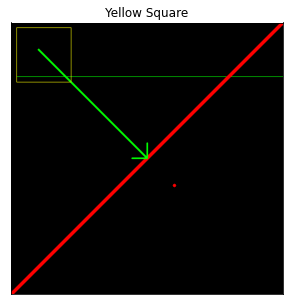

In [10]:
yellow = (0, 255, 255)
cv2.rectangle(black_canvas, (10, 10), (110, 110), yellow)
img_show("Yellow Square", black_canvas)

다른 직사각형을 그립니다. 이 직사각형은 5픽셀 두께의 파랑색입니다.

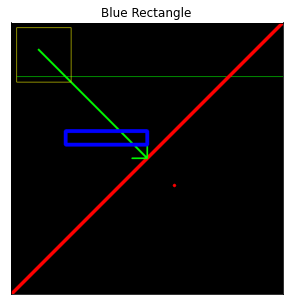

In [11]:
blue = (255, 0, 0)
cv2.rectangle(black_canvas, (100, 200), (250, 225), blue, 5)
img_show("Blue Rectangle", black_canvas)

색깔이 채워진 Cyan색상의 사각형을 그립니다.

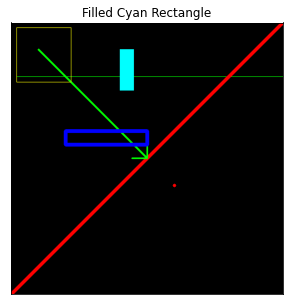

In [12]:
cyan = (255, 255, 0)
cv2.rectangle(black_canvas, (200, 50), (225, 125), cyan, -1)
img_show("Filled Cyan Rectangle", black_canvas)

### Draw Circle
원을 그리는 것은 사각형을 그리는 것만큼 간단하지만 함수 인수는 약간 다릅니다.

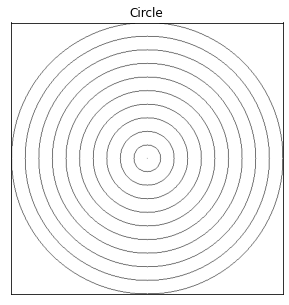

In [13]:
(centerX, centerY) = (white_canvas.shape[1] // 2, white_canvas.shape[0] // 2)
black = (0, 0, 0)

for r in range(0, 275, 25):
    # 25픽셀씩 증가하는 크기로 흰색 원을 그립니다
    cv2.circle(white_canvas, (centerX, centerY), r, black)
    
img_show("Circle", white_canvas)

랜덤하게 원을 그릴 수 도 있습니다.

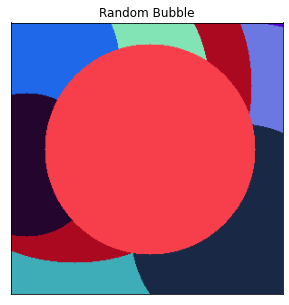

In [14]:
random_bubble_canvas = np.zeros((300, 300, 3), dtype="uint8")

for i in range(0, 25):
    # 5와 200사이의 랜덤하게 반지름 크기를 정함
    radius = np.random.randint(5, high=200)
    # 랜덤하게 색상을 선택
    color = np.random.randint(0, high=256, size=(3,)).tolist()
    # 그려질 임의의 점을 선택
    pt = np.random.randint(0, high=300, size=(2,))

    cv2.circle(random_bubble_canvas, tuple(pt), radius, color, -1)

img_show("Random Bubble", random_bubble_canvas)

### Drawing on images with OpenCV
이미지 위에 그리기

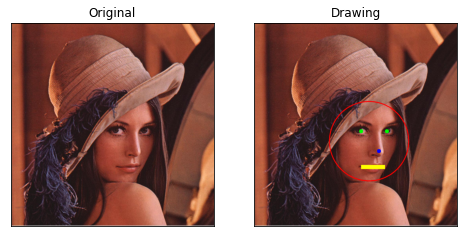

In [16]:
cv2_image = cv2.imread('asset/images/test_image.jpg', cv2.IMREAD_COLOR)
drawing_image = cv2_image.copy()

cv2.circle(drawing_image, (580, 600), 200, (0, 0, 255), 3)
cv2.circle(drawing_image, (540, 550), 10, (0, 255, 0), -1)
cv2.circle(drawing_image, (670, 550), 10, (0, 255, 0), -1)
cv2.circle(drawing_image, (630, 650), 10, (255, 0, 0), -1)
cv2.rectangle(drawing_image, (540, 720), (660, 740), (0, 255, 255), -1)

img_show(["Original", "Drawing"], [cv2_image, drawing_image])